# Linear and Logistic Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

## Importing the dataset

In [3]:
dataset=pd.read_csv('HRV.csv')

In [4]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


## Dataset Preprocessing

In [5]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
totChol_median=dataset['totChol'].median()
BMI_median=dataset['BMI'].median()
heartRate_median=dataset['heartRate'].median()
glucose_median=dataset['glucose'].median()

dataset['totChol'].fillna(totChol_median, inplace=True)
dataset['BMI'].fillna(BMI_median,inplace=True)
dataset['heartRate'].fillna(heartRate_median,inplace=True)
dataset['glucose'].fillna(glucose_median,inplace=True)

In [7]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## A. Linear Regression - Create a model to predict the cholestrol level of a person

### Create independent and dependent variables to predict 

In [8]:
X=dataset.drop('totChol',axis=1)
y=dataset[['totChol']]

In [9]:
X.sample()

,male,age,currentSmoker,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
704,1,58,1,135.0,85.5,21.24,88.0,103.0,0


## Splitting the dataset into the Training set and Test set

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                  test_size=.20,
                                                random_state=54)

## Training the Linear Regression model 

In [11]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train.values,y_train)

y_pred=regressor.predict(X_test.values)

## Model performance check- R Square and RMSE score

In [12]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"r2_score: {r2_score(y_test,y_pred):.2f}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.0f}")

r2_score: 0.05
RMSE: 46


## Predicting new results where the actual results are given
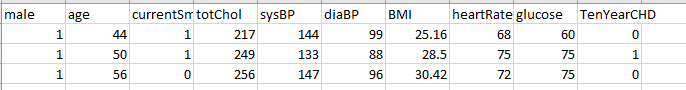

In [13]:
# case 1 actual 217
print(regressor.predict([[1,44,1,144,99,25.16,68,60,0]]))

[[230.62719939]]


In [14]:
# case 2 actual 249
print(regressor.predict([[1,50,1,133,88,28.5,75,75,1]]))

[[241.07021319]]


In [15]:
# case 3 actual 256
print(regressor.predict([[1,56,0,147,96,30.42,72,75,0]]))

[[246.34851986]]


### Summary
* This model had a really low r2 score at 0.05 which means that the model did not fit will with the data however ther was a relatively low RMSE score of 46. This meant that the linear regression model was able to predict with relative accuracy on the cholestoral level.

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

### Create independent and dependent variables to predict

In [16]:
X=dataset.drop('TenYearCHD',axis=1)
y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,
                                                  test_size=.20,
                                                  random_state=42)

## Training the Logistic Regression model 

In [18]:
from sklearn.linear_model import LogisticRegression 
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values ,y_train.values.ravel())

LogisticRegression(max_iter=1000)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

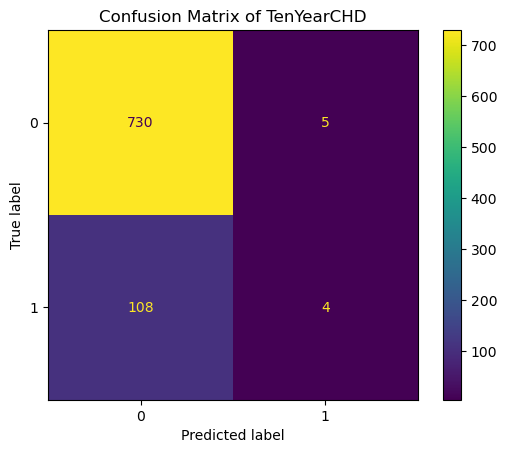

In [23]:
y_pred=classifier.predict(X_test.values)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classifier.classes_)
disp.plot()
plt.title('Confusion Matrix of TenYearCHD')
plt.show()

### Discuss the results

#### This confusion matrix shows that this logistical model shows that it has a more type 2 errors in it which is really bad for a healthcare model as if something is wrong you want to be able to go and treat it and its better to have a false positive than not catch the error

## Predicting new results where the actual results are given
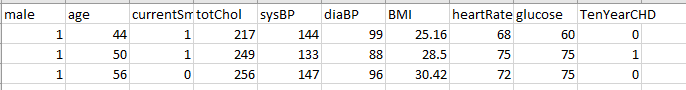

In [28]:
print("Patient 1", classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))

Patient 1 [0]


In [26]:
print("Patient 2", classifier.predict([[1,50,1,249,133,88,28.5,75,75]]))

Patient 2 [0]


In [27]:
print("Patient 3", classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))

Patient 3 [0]


### Summary
* The confusion matrix showed a type 2 error and when doing the predicition values it was able to predict the 3rd adn 1st patient correctly but incorrectly predicted the other patient. This linear regression model was not very good as it made a lot of type 2 errors, so medically it is the worse kind of error to make and it also was not very reliable in predicting the values of if someone had ten year CHD. 